<a href="https://colab.research.google.com/github/ramjv/RCNN/blob/master/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

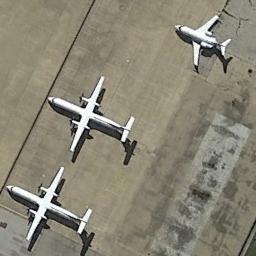

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import csv
from csv import reader
import pandas as pd
from matplotlib import patches
%matplotlib inline
from google.colab.patches import cv2_imshow

df = pd.read_csv("/content/airplane.csv")
img = cv2.imread("/content/airplane_001.jpg")
cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for _,row in df[df.image_names == "airplane_001.jpg"].iterrows():
    xmin = row.x1
    xmax = row.x2
    ymin = row.y1
    ymax = row.y2

    width = xmax - xmin
    height = ymax - ymin

    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
cv2_imshow(img)



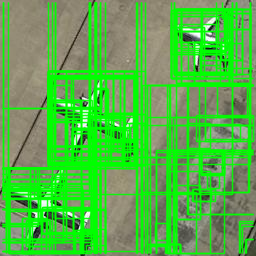

In [18]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
im = cv2.imread("/content/airplane_001.jpg")
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
cv2_imshow(imOut)